In [50]:
# -------------------- 1. Imports --------------------
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

In [51]:
# 2. Load and Clean Data
df = pd.read_csv("adult.csv")

df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

if 'fnlwgt' in df.columns:
    df.drop('fnlwgt', axis=1, inplace=True)

Outlier Detection & Filtering

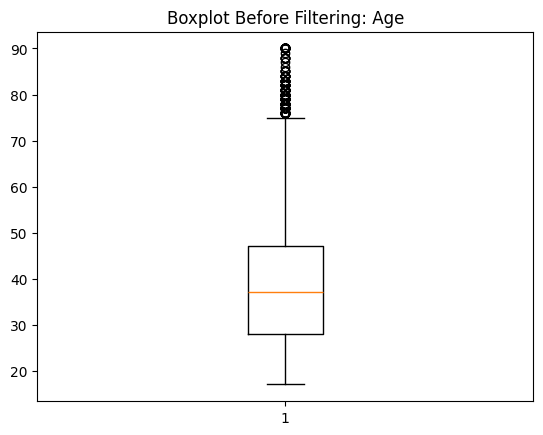

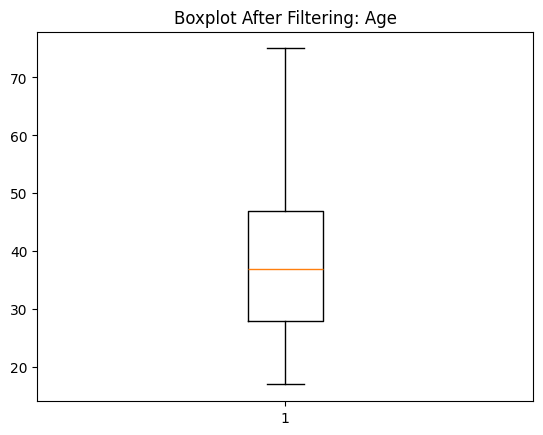

In [52]:
#Outlier Detection & Filtering
# Age
plt.boxplot(df['age'])
plt.title("Boxplot Before Filtering: Age")
plt.show()

df = df[(df['age'] >= 17) & (df['age'] <= 75)]

plt.boxplot(df['age'])
plt.title("Boxplot After Filtering: Age")
plt.show()

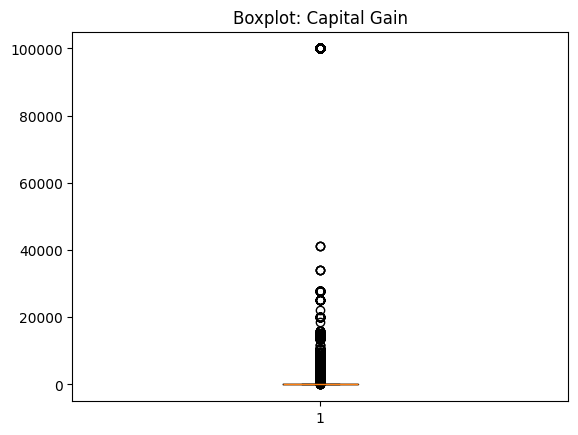

In [53]:
# Capital Gain
plt.boxplot(df['capital-gain'])
plt.title("Boxplot: Capital Gain")
plt.show()

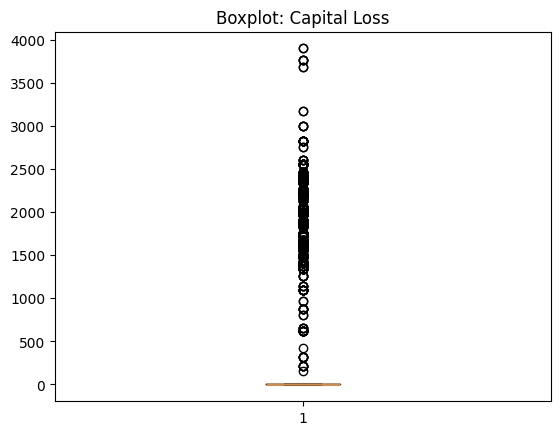

In [54]:
# Capital Loss
plt.boxplot(df['capital-loss'])
plt.title("Boxplot: Capital Loss")
plt.show()

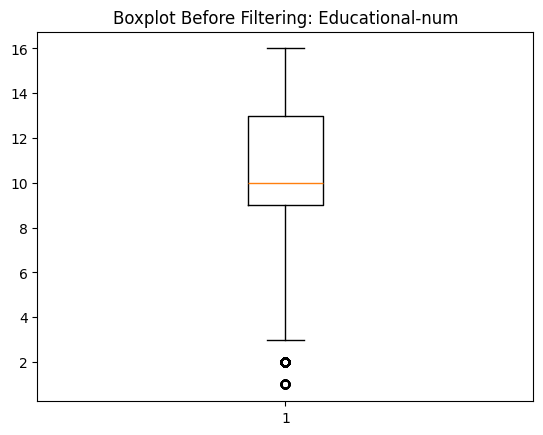

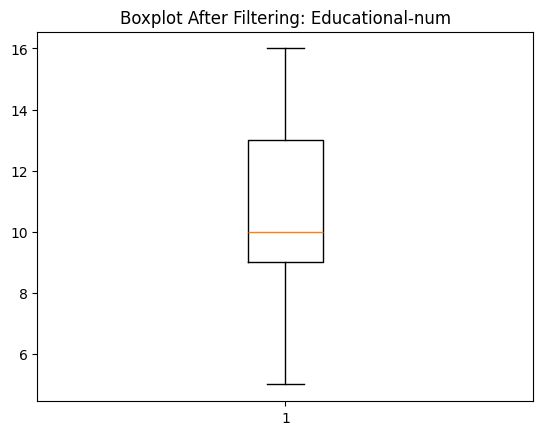

In [55]:
# Educational-num
plt.boxplot(df['educational-num'])
plt.title("Boxplot Before Filtering: Educational-num")
plt.show()

df = df[(df['educational-num'] >= 5) & (df['educational-num'] <= 16)]

plt.boxplot(df['educational-num'])
plt.title("Boxplot After Filtering: Educational-num")
plt.show()


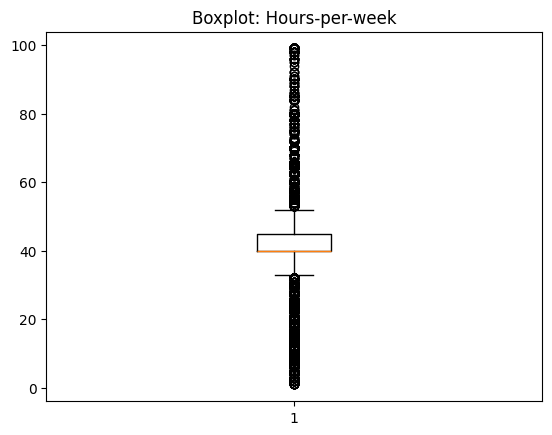

In [56]:
# Hours-per-week
plt.boxplot(df['hours-per-week'])
plt.title("Boxplot: Hours-per-week")
plt.show()

In [57]:
# Final shape after outlier filtering
print("Data shape after filtering:", df.shape)

Data shape after filtering: (43400, 14)


In [58]:
# 3. Encode Categorical Features
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [59]:
# 4. Feature Selection
X = df.drop('income', axis=1)
y = df['income']

In [60]:
# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# 8. Random Forest with Grid Search (Tuned)
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

rf_model = grid.best_estimator_
y_pred = rf_model.predict(X_test_scaled)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Random Forest Accuracy: 0.8574884792626728

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6439
           1       0.78      0.63      0.69      2241

    accuracy                           0.86      8680
   macro avg       0.83      0.78      0.80      8680
weighted avg       0.85      0.86      0.85      8680


🧮 Confusion Matrix:
 [[6042  397]
 [ 840 1401]]


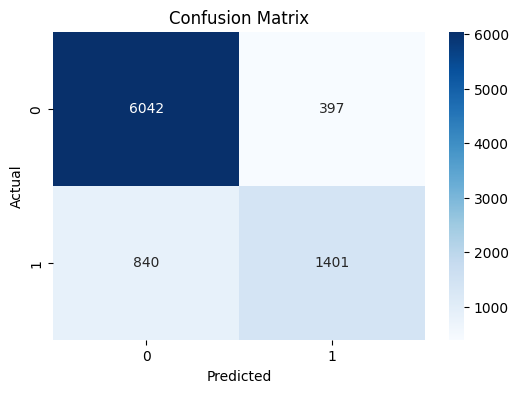

In [62]:
# 9. Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

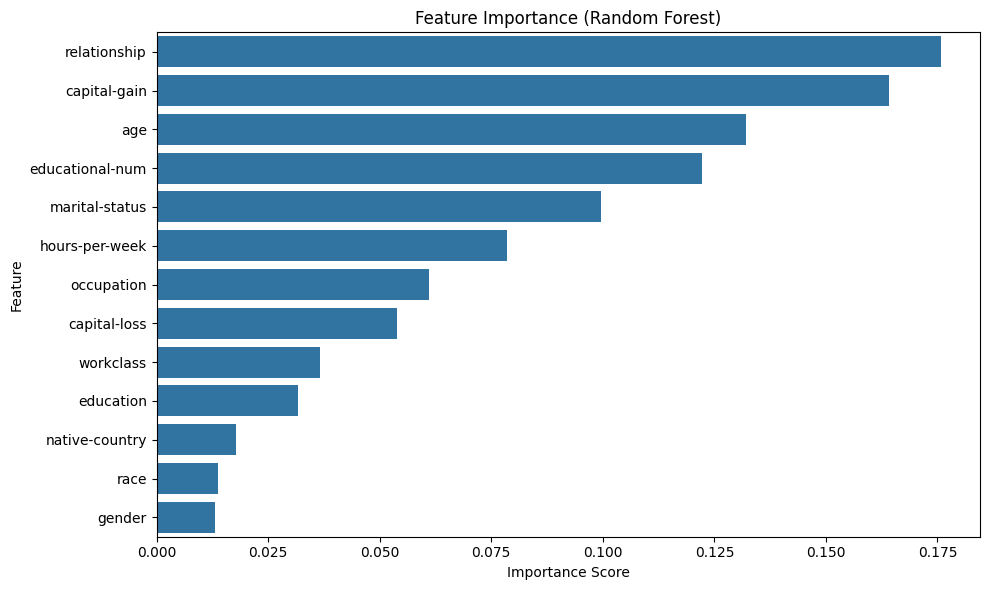

In [63]:
# 10. Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [64]:
# 11. Save Model, Scaler, and Encoders
joblib.dump(rf_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']